In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

from scipy.integrate import solve_ivp


%matplotlib inline

In [ ]:
def forced_pendulum(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m * np.sin(w * u_3)
    f_3 = 1.
    
    return [f_1, f_2, f_3]

In [48]:
def sim_pendulum(params, u0=[0,0,0], t_start=0., t_stop=500., t_steps=100000, wrap=True):
    m, g, w = params
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    if wrap:
        solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]
    
    return solution

def eigenvalue(solution, g):
    ev1 = []
    ev2 = []
    for a in solution.y[0]:
        if ((g**2 - np.cos(a))< 0) :
            ev1.append(-g)
            ev2.append(-g)
        else:
            ev1.append(-g + cmath.sqrt(g**2 - np.cos(a)))
            ev2.append(-g - cmath.sqrt(g**2 - np.cos(a)))
    ev=[ev1,ev2]
    return ev
"""
def calc_eigenvalues(g, u_1):
    if  isinstance(u_1 ,(int,float)):
        term = np.sqrt(np.complex(g**2 - np.cos(u_1)))
        sig_1 = -g + np.real(term)
        sig_2 = -g - np.real(term)

        return sig_1, sig_2
    
    else:
        out_1 = []
        out_2 = []
        for u in u_1.astype(complex):
            term = np.sqrt(g**2 - np.cos(u))
            sig_1 = -g + np.real(term)
            sig_2 = -g - np.real(term)
            out_1.append(sig_1)
            out_2.append(sig_2)

        return out_1, out_2
"""
def difference(solution_a,solution_b):
    return np.sqrt((solution_a.y[0]- solution_b.y[0])**2+(solution_a.y[1]- solution_b.y[1])**2)

def calc_eigenvectors(g, u_1):
    term = np.real(np.sqrt(np.complex(g**2 - np.cos(u_1))))
    e_1 = [-g - term, np.cos(u_1)]
    e_2 = [-g + term, np.cos(u_1)]

    return e_1, e_2


def mean_int (ev,t_start=0., t_stop=500., t_steps=100000):
    T = np.linspace(t_start, t_stop, int(t_steps))
    mean_max=[]
    mean_min=[]
    
    for i in range(len(T)-1):
        if i == 0:
            mean_max.append((ev[0][i+1]+ev[0][i]))
            mean_min.append((ev[1][i+1]+ev[1][i]))
        else:
            mean_max.append(1/T[i]*(T[i-1]*mean_max[i-1]+(ev[0][i+1]+ev[0][i])*(T[i+1]-T[i])))
            mean_min.append(1/T[i]*(T[i-1]*mean_min[i-1]+(ev[1][i+1]+ev[1][i])*(T[i+1]-T[i])))
            
    return[mean_max, mean_min]
   

# 2a) #
# periodic regime #

In [49]:

solution =sim_pendulum((0.91, 0.1, .8))
eig, eig_  = calc_eigenvalues(0.1,solution.y[0])


Text(0.5, 0, 'timesteps')

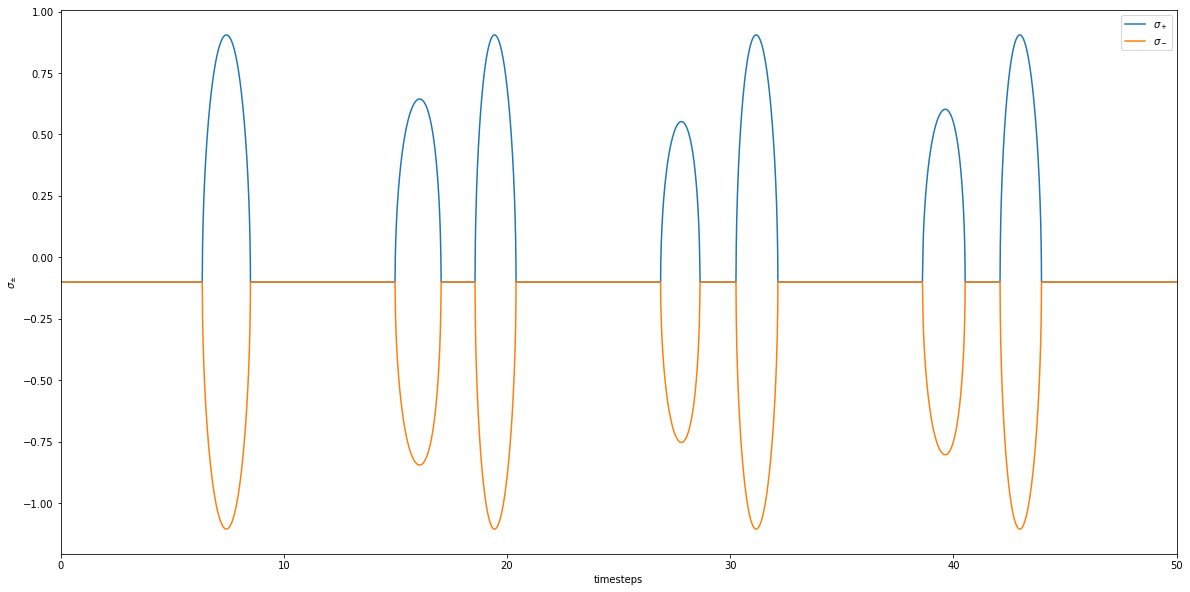

In [63]:
plt.figure(figsize=(20,10))
plt.plot(solution.y[2], eig,label= r'$\sigma_+$')
plt.plot(solution.y[2], eig_, label= r'$\sigma_-$')
plt.xlim(0,50)
plt.legend()
plt.ylabel(r'$\sigma_{\pm}$')
plt.xlabel('timesteps')

# chaotic regime #

In [65]:
ev = eigenvalue(sim_pendulum((1.15, 0.1, 0.8)),0.1)
solution =sim_pendulum((1.15, 0.1, .8))

#print(solution.y[0])


Text(0.5, 0, 'timesteps')

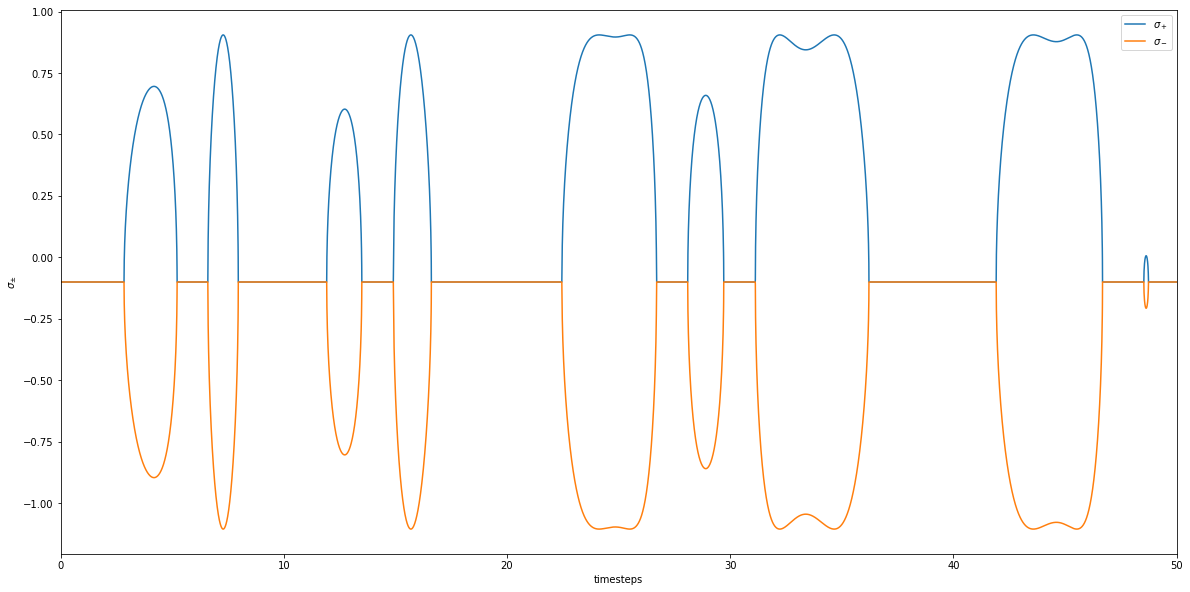

In [66]:
plt.figure(figsize=(20,10))
plt.plot(solution.y[2], ev[0],label= r'$\sigma_+$')
plt.plot(solution.y[2], ev[1],label= r'$\sigma_-$')
plt.xlim(0,50)
plt.legend()
plt.legend()
plt.ylabel(r'$\sigma_{\pm}$')
plt.xlabel('timesteps')

# 2b #
# unstabel #

Text(0, 0.5, 'difference(t)')

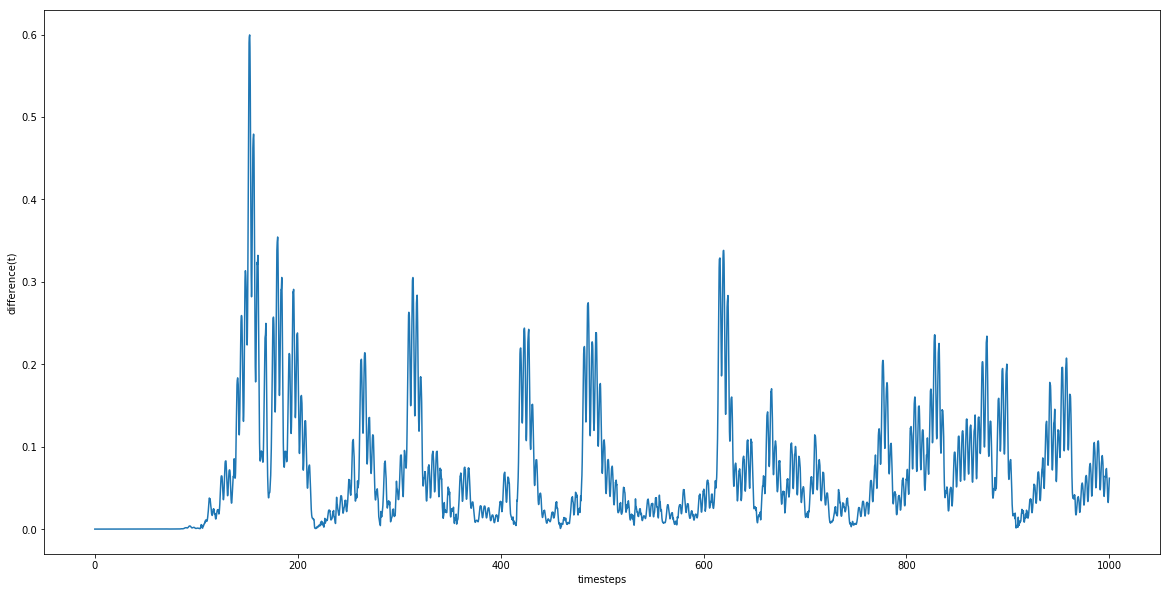

In [68]:
m, g, w = .87, .1, .8
u0 = [2.6, 0, 0]
eps = 1e-9
ev = calc_eigenvectors(g, u0[0])[0]
perp = [u0[0] + ev[0]*eps,u0[1] + ev[1]*eps, u0[2]]

simulation_a = sim_pendulum((m, g, w), t_stop=1000, u0=perp, wrap=False)
simulation_b = sim_pendulum((m, g, w), t_stop=1000, u0=u0, wrap=False)

diff = difference(simulation_a,simulation_b)
plt.figure(figsize=(20,10))
plt.plot(simulation_a.y[2],diff)
plt.xlabel('timesteps')
plt.ylabel('difference(t)')

# stabel #

Text(0, 0.5, 'difference(t)')

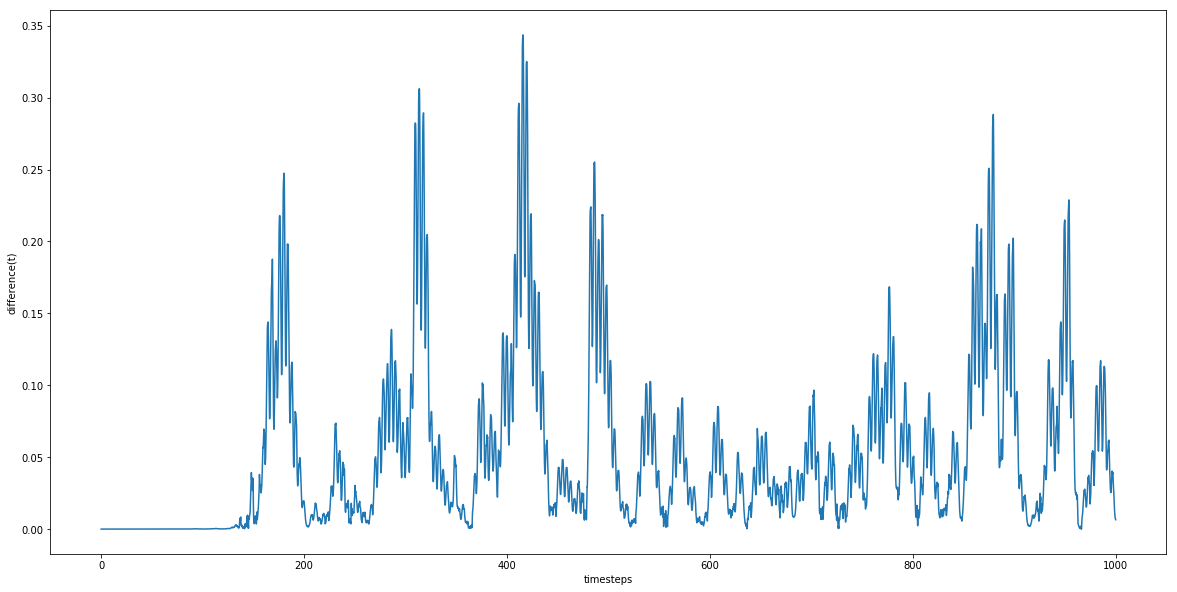

In [69]:
m, g, w = .87, .1, .8
u0 = [2.6, 0, 0]
eps = 1e-9
ev = calc_eigenvectors(g, u0[0])[1]
perp = [u0[0] + ev[0]*eps,u0[1] + ev[1]*eps, u0[2]]

simulation_a = sim_pendulum((m, g, w), t_stop=1000, u0=perp, wrap=False)
simulation_b = sim_pendulum((m, g, w), t_stop=1000, u0=u0, wrap=False)

diff = difference(simulation_a,simulation_b)


plt.figure(figsize=(20,10))
plt.plot(simulation_a.y[2],diff)
plt.xlabel('timesteps')
plt.ylabel('difference(t)')

# 2c) # 

In [57]:
m, g, w = .87, .1, .8
t_start=1000
t_stop=1500
t_steps=100000
simulation_a = sim_pendulum((m, g, w), t_start=t_start,t_stop=t_stop, t_steps=t_steps)#, wrap=False)
ev= eigenvalue(simulation_a, g)
mean = mean_int(ev, t_start, t_stop, t_steps)

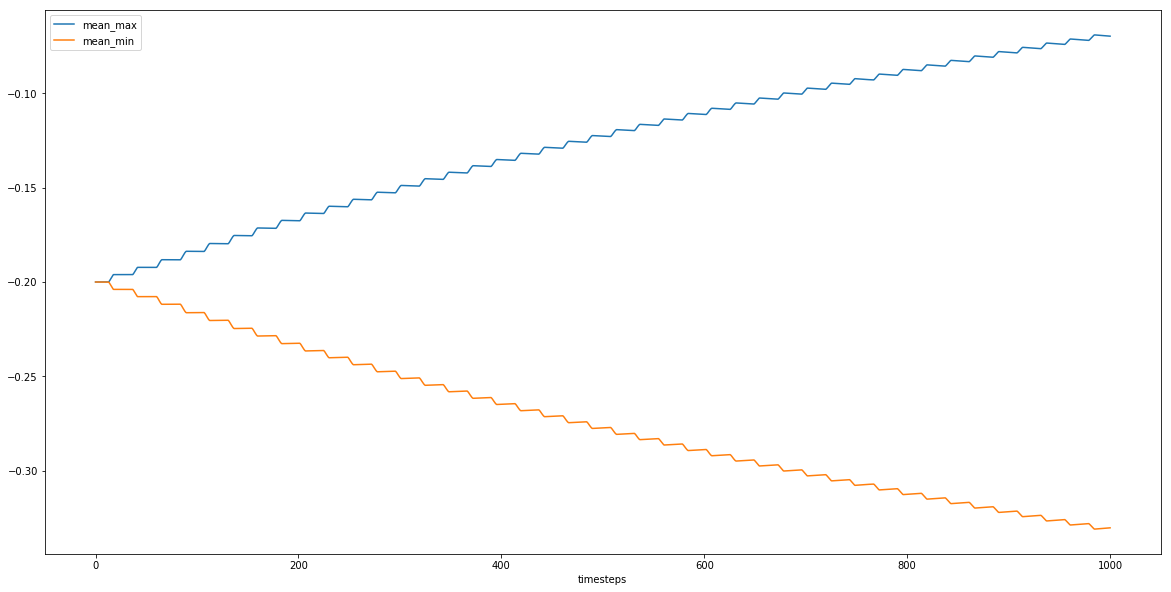

In [71]:
plt.figure(figsize=(20,10))
plt.plot(simulation_a.y[2][:-1],mean[0],label= 'mean_max')
plt.plot(simulation_a.y[2][:-1],mean[1],label= 'mean_min')
plt.xlabel('timesteps')
plt.legend()